# Supply Chain Network Design

## Case Study: SunOil Facility Allocation

In [4]:
from IPython.display import Image
from pulp import * # Import PuLP modeler functions
import pandas as pd

SunOil, a manufacturer of petrochemical products with worldwide sales. Shican, as a supply chain manager, is considering establishing facilities to meet demand. One possibility is to set up a facility in a few of the regions. Shican made an investigation of the following five regions- North American, South American, Europe, Africa, and Asia. The data is collected in the Table 1. Shican has to decide the location of the facility and allocate the demand to minimize the cost.
1. What is the annual demand of each region?
2. Which part shows us the production/transportation cost?
3. Which part shows us the fixed cost associated with the capacities?
4. What is the difference between the variable cost and the fixed cost?

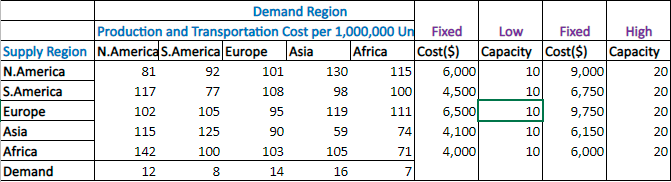

In [5]:
Image(filename='picture1.png',width=800,height=800)

### objective function
$\operatorname{Max}$ Profit $=\sum_{i=1}^{n} f_{i} \cdot y_{i}+\sum_{i=1}^{n} \sum_{i=1}^{m} c_{i, j} \cdot x_{i, j}$
### boundry conditions
$\sum_{i=1}^{n} x_{i, j}=D_{j} \quad j=1, \ldots m$

$\begin{array}{ll}\sum_{j=1}^{m} x_{i, j} \leq K_{i} \cdot y_{i} & i=1, \ldots n   \end{array}$

$y_{i} \in\{0,1\}$

## Case 1: 


Consolidate plants in a few regions
 - Advantages: improve economies of scale
 - Disadvatages: increases transportation cost and duties


In [8]:
# Creates a list of all the supply nodes
Warehouses = ["N.America", "S.America", "Europe", "Asia", "Africa"]

# Creates a dictionary for the number of units of supply for each supply node
supply_low = {"N.America": 10,
          "S.America": 10,
         "Europe": 10,
         "Asia": 10,
         "Africa": 10}
supply_high = {"N.America": 20,
          "S.America": 20,
         "Europe": 20,
         "Asia": 20,
         "Africa": 20}
supply_cost_low = {"N.America": 6000,
          "S.America": 4500,
         "Europe": 6500,
         "Asia": 4100,
         "Africa": 4000}
supply_cost_hign = {"N.America": 9000,
          "S.America": 6750,
         "Europe": 9750,
         "Asia": 6150,
         "Africa": 6000}

# Creates a list of all demand nodes
Bars = ["N.America", "S.America", "Europe", "Asia", "Africa"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"N.America":12,
          "S.America":8,
          "Europe":14,
          "Asia":16,
          "Africa":7 }

# Creates a list of costs of each transportation path
df = pd.read_csv('cost.csv',header=None)
costs =  df.values
costs = [   #Bars
         [81,92,101,130,115],
         [117,77,108,98,100],
         [102,105,95,119,111],#A   Warehouses
         [115,125,90,59,74], #B
         [142,100,103,105,71]
         ]
# The cost data is made into a dictionary
costs = makeDict([Warehouses,Bars],costs,0)

In [9]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None)
vars2 = LpVariable.dicts("Built",Warehouses,cat='Binary')
vars3 = LpVariable.dicts("Built2",Warehouses,cat='Binary')

# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]) + lpSum([vars2[w]*supply_cost_low[w] for w in Warehouses]) + lpSum([vars3[w]*supply_cost_hign[w] for w in Warehouses]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=(lpDot(supply_low[w],vars2[w]) + lpDot(supply_high[w],vars3[w])), "Sum_of_Products_out_of_Warehouse_%s"%w
#    prob += LpConstraint(e=(vars2[w] + vars3[w]), sense=LpConstraintGE, rhs=1)

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])==demand[b], "Sum_of_Products_into_Bar%s"%b
                   
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Status: Optimal
Built2_Africa = 1.0
Built2_Asia = 1.0
Built2_Europe = 0.0
Built2_N.America = 0.0
Built2_S.America = 1.0
Built_Africa = 0.0
Built_Asia = 0.0
Built_Europe = 0.0
Built_N.America = 0.0
Built_S.America = 0.0
Route_Africa_Africa = 7.0
Route_Africa_Asia = 0.0
Route_Africa_Europe = 10.0
Route_Africa_N.America = 0.0
Route_Africa_S.America = 0.0
Route_Asia_Africa = 0.0
Route_Asia_Asia = 16.0
Route_Asia_Europe = 4.0
Route_Asia_N.America = 0.0
Route_Asia_S.America = 0.0
Route_Europe_Africa = 0.0
Route_Europe_Asia = 0.0
Route_Europe_Europe = 0.0
Route_Europe_N.America = 0.0
Route_Europe_S.America = 0.0
Route_N.America_Africa = 0.0
Route_N.America_Asia = 0.0
Route_N.America_Europe = 0.0
Route_N.America_N.America = 0.0
Route_N.America_S.America = 0.0
Route_S.America_Africa = 0.0
Route_S.America_Asia = 0.0
Route_S.America_Europe = 0.0
Route_S.America_N.America = 12.0
Route_S.America_S.America = 8.0
Total Cost of Transportation =  23751.0


Thus, we obtain the following results:

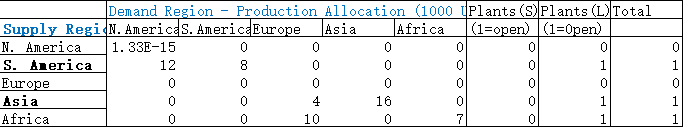

In [12]:
Image(filename='picture3.png',width=800,height=800)

1. The lowest-cost network will have facilities located in South America, Asia, and Africa.
2. A high-capacity plant should be planned in each region.
3. The plant in South America meets the North America demand, whereas the European demand is met from
plants in Asia and Africa.

# Case 2: 
Set up facility in each region

 - Advantages: lowers transportation cost
 - Disadvantages: but plants are sized to meet local demand regions. 
   Not fully exploit economies of scale.

In this case, we must rewrite constrants:

 $\begin{array}{ll}\sum_{j=1}^{m} x_{i, j} \leq K^{low}_{i} \cdot y^{low}_{i}+ K^{hign}_{i} \cdot y^{hign}_{i} & i=1, \ldots n   \end{array}$

$y^{high}_{i},\; y^{low}_{i} \in\{0,1\}$

$y^{high}_{i} + y^{low}_{i} = 1$

In [11]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("Beer Distribution Problem",LpMinimize)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in Warehouses for b in Bars]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(Warehouses,Bars),0,None)
vars2 = LpVariable.dicts("Built",Warehouses,cat='Binary')
vars3 = LpVariable.dicts("Built2",Warehouses,cat='Binary')

# The objective function is added to 'prob' first
prob += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]) + lpSum([vars2[w]*supply_cost_low[w] for w in Warehouses]) + lpSum([vars3[w]*supply_cost_hign[w] for w in Warehouses]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in Warehouses:
    prob += lpSum([vars[w][b] for b in Bars])<=(lpDot(supply_low[w],vars2[w]) + lpDot(supply_high[w],vars3[w])), "Sum_of_Products_out_of_Warehouse_%s"%w
    prob += LpConstraint(e=(vars2[w] + vars3[w]), sense=LpConstraintGE, rhs=1)

# The demand minimum constraints are added to prob for each demand node (bar)
for b in Bars:
    prob += lpSum([vars[w][b] for w in Warehouses])==demand[b], "Sum_of_Products_into_Bar%s"%b
                   
# The problem data is written to an .lp file
prob.writeLP("BeerDistributionProblem.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen    
print("Total Cost of Transportation = ", value(prob.objective))

Status: Optimal
Built2_Africa = 0.0
Built2_Asia = 1.0
Built2_Europe = 0.0
Built2_N.America = 0.0
Built2_S.America = 0.0
Built_Africa = 1.0
Built_Asia = 0.0
Built_Europe = 1.0
Built_N.America = 1.0
Built_S.America = 1.0
Route_Africa_Africa = 7.0
Route_Africa_Asia = 0.0
Route_Africa_Europe = 2.0
Route_Africa_N.America = 0.0
Route_Africa_S.America = 0.0
Route_Asia_Africa = 0.0
Route_Asia_Asia = 16.0
Route_Asia_Europe = 4.0
Route_Asia_N.America = 0.0
Route_Asia_S.America = 0.0
Route_Europe_Africa = 0.0
Route_Europe_Asia = 0.0
Route_Europe_Europe = 8.0
Route_Europe_N.America = 2.0
Route_Europe_S.America = 0.0
Route_N.America_Africa = 0.0
Route_N.America_Asia = 0.0
Route_N.America_Europe = 0.0
Route_N.America_N.America = 10.0
Route_N.America_S.America = 0.0
Route_S.America_Africa = 0.0
Route_S.America_Asia = 0.0
Route_S.America_Europe = 0.0
Route_S.America_N.America = 0.0
Route_S.America_S.America = 8.0
Total Cost of Transportation =  31547.0


Consequently, we obtain 

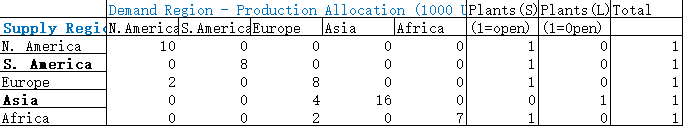

In [13]:
Image(filename='picture2.png',width=800,height=800)

The total cost of transportation in Case 2 is 31547 > 23751 in case 1.
Thus, the company would like to consolidate facilities in South America, Asia, and Africa, where the labour cost is relatively low. Moreover, consolidation could help 
realize economic of scale.

Some alternative scenario to try

1 What if a plant must be built in Europe? 
In this case, add I6>=0 in constraint

2 What if a plant must be built in every market? 
In this case, add I14:I18>=0 in constraint
